# ★원점을 지나는 회귀방정식★   
#### 일반적으로 회귀모델에서는 '상수항'을 포함해야한다.
#### 그러나 사망자수, 중상자수, 경상자수, 부상신고자수 로 구성된 EPDO 값 특성상  사고가 발생하지 않으면 EPDO의 값은 0이 도출된다.
#### 따라서 독립변수들의 계수가 0이면 (사고가 발생하지 않으면) 종속변수의 값도 0이 되어야 하므로 원점을 지나는 회귀모델을 사용하겠다.

In [35]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS
import statsmodels.api as sm

In [36]:
df=pd.read_csv('C:/Users/user/TEST3/csv파일/데이터셋_2_2(EPDO1).csv',encoding='cp949')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58059 entries, 0 to 58058
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   사고유형         58059 non-null  int64
 1   연령가해자        58059 non-null  int64
 2   법규위반가해자      58059 non-null  int64
 3   행동유형가해자      58059 non-null  int64
 4   피해자신체상해주부위   58059 non-null  int64
 5   차량용도가해자_중분류  58059 non-null  int64
 6   도로종류         58059 non-null  int64
 7   도로형태         58059 non-null  int64
 8   도로선형         58059 non-null  int64
 9   발생시각         58059 non-null  int64
 10  EPDO1        58059 non-null  int64
dtypes: int64(11)
memory usage: 4.9 MB


# 전체 변수들과의 ols 회귀분석 진행
### 설명변수(X)와 타겟변수(Y)를 분리/학습데이터와 평가데이터를 분할
##### Split Data Set Shape 출력물

In [38]:
y=df['EPDO1']

In [39]:
feature_columns = df.columns.difference(["EPDO1"]) # Target column 빼기

X=df.drop(['EPDO1'],axis=1)
y=pd.DataFrame(df['EPDO1'])

train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.7, test_size = 0.3)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(40641, 10) (17418, 10) (40641, 1) (17418, 1)


# 1.1) train & OLS 회귀모델 적합
###  ▶ R-squared(설명력): 32.2%
###  ▶ AIC: 4.546e+05
###  ▶ 유의하지 않은 독립변수: 도로선형(P_value = 0.468)

In [40]:
full_model = sm.OLS(train_y,train_x)
fitted_full_model = full_model.fit()

fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  EPDO1   R-squared (uncentered):                   0.322
Model:                            OLS   Adj. R-squared (uncentered):              0.322
Method:                 Least Squares   F-statistic:                              1930.
Date:                Mon, 07 Dec 2020   Prob (F-statistic):                        0.00
Time:                        09:45:00   Log-Likelihood:                     -2.2726e+05
No. Observations:               40641   AIC:                                  4.545e+05
Df Residuals:                   40631   BIC:                                  4.546e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
사고유형            0.8743      0.185      4.730      0.000       0.512       1.237
연령가해자          -1.9677      0.200     -9.846      0.000      -2.359      -1.576
법규위반가해자         0.5076      0.259      1.957      0.050      -0.001       1.016
행동유형가해자         2.1100      0.139     15.229      0.000       1.838       2.382
피해자신체상해주부위      2.1122      0.062     34.147      0.000       1.991       2.233
차량용도가해자_중분류     1.1738      0.089     13.195      0.000       0.999       1.348
도로종류            5.4680      0.261     20.965      0.000       4.957       5.979
도로형태           -5.5045      0.399    -13.799      0.000      -6.286      -4.723
도로선형            0.1753      0.583      0.301      0.764      -0.968       1.319
발생시각            3.0974      0.167     18.515      0.000       2.770       3.425
==============================================================================
Omnibus:                    26082.358   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           267389.927
Skew:                           3.060   Prob(JB):                         0.00
Kurtosis:                      13.975   Cond. No.                         29.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 1.2) 다중공선성 검사

## 출력된 VIF Factor 값이 10크면 다중공선성이 있다는 것이다.

In [41]:
corolla = pd.concat([train_x,train_y],axis=1)

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(corolla.values, i) for i in range(corolla.shape[1])]
vif["features"] = corolla.columns
vif

,VIF Factor,features
0,2.937186,사고유형
1,8.091501,연령가해자
2,8.687181,법규위반가해자
3,7.670294,행동유형가해자
4,2.956081,피해자신체상해주부위
5,8.449203,차량용도가해자_중분류
6,3.024917,도로종류
7,10.175442,도로형태
8,5.254789,도로선형
9,4.066050,발생시각


## 1.3) VIF Factor가 10 이상인 <도로형태> 컬럼 삭제

In [43]:
X = X.drop(['도로형태'],axis=1)

# 2.1) OLS 재진행
###  ▶ R-squared(설명력): 32.0%
###  ▶ AIC: 4.547e+05
###  ▶ 유의하지 않은 독립변수: 도로선형(P_value = 0.059)

In [44]:
train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.7, test_size = 0.3)
fitted_full_model = full_model.fit()
fitted_full_model.summary()

full_model = sm.OLS(train_y,train_x)
fitted_full_model = full_model.fit()

fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  EPDO1   R-squared (uncentered):                   0.320
Model:                            OLS   Adj. R-squared (uncentered):              0.319
Method:                 Least Squares   F-statistic:                              2121.
Date:                Mon, 07 Dec 2020   Prob (F-statistic):                        0.00
Time:                        09:45:03   Log-Likelihood:                     -2.2700e+05
No. Observations:               40641   AIC:                                  4.540e+05
Df Residuals:                   40632   BIC:                                  4.541e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
사고유형            0.7818      0.183      4.265      0.000       0.423       1.141
연령가해자          -2.2519      0.198    -11.389      0.000      -2.639      -1.864
법규위반가해자        -0.6515      0.249     -2.622      0.009      -1.139      -0.164
행동유형가해자         1.6997      0.133     12.747      0.000       1.438       1.961
피해자신체상해주부위      2.0007      0.061     32.745      0.000       1.881       2.120
차량용도가해자_중분류     0.9857      0.088     11.248      0.000       0.814       1.158
도로종류            5.0685      0.260     19.516      0.000       4.559       5.578
도로선형           -1.0737      0.570     -1.885      0.059      -2.190       0.043
발생시각            2.8790      0.165     17.400      0.000       2.555       3.203
==============================================================================
Omnibus:                    26082.370   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           257820.411
Skew:                           3.078   Prob(JB):                         0.00
Kurtosis:                      13.694   Cond. No.                         28.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 2.2) <도로선형> 컬럼 삭제 후

In [45]:
X = X.drop(['도로선형'],axis=1)

# 2.3) ols 모델 재진행
###  ▶ R-squared(설명력): 32.0%
###  ▶ AIC: 4.538e+05

In [48]:
train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.7, test_size = 0.3)
fitted_full_model = full_model.fit()
fitted_full_model.summary()

full_model = sm.OLS(train_y,train_x)
fitted_full_model = full_model.fit()

fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  EPDO1   R-squared (uncentered):                   0.320
Model:                            OLS   Adj. R-squared (uncentered):              0.320
Method:                 Least Squares   F-statistic:                              2392.
Date:                Mon, 07 Dec 2020   Prob (F-statistic):                        0.00
Time:                        09:48:18   Log-Likelihood:                     -2.2689e+05
No. Observations:               40641   AIC:                                  4.538e+05
Df Residuals:                   40633   BIC:                                  4.539e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
사고유형            0.7496      0.182      4.112      0.000       0.392       1.107
연령가해자          -2.2839      0.195    -11.715      0.000      -2.666      -1.902
법규위반가해자        -0.6898      0.243     -2.842      0.004      -1.166      -0.214
행동유형가해자         1.5840      0.132     12.000      0.000       1.325       1.843
피해자신체상해주부위      1.9675      0.061     32.322      0.000       1.848       2.087
차량용도가해자_중분류     0.9556      0.087     11.018      0.000       0.786       1.126
도로종류            5.1115      0.258     19.794      0.000       4.605       5.618
발생시각            2.9546      0.163     18.099      0.000       2.635       3.275
==============================================================================
Omnibus:                    26080.901   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           255960.950
Skew:                           3.081   Prob(JB):                         0.00
Kurtosis:                      13.639   Cond. No.                         13.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### ▶ y 예측값
####  → 소수 첫째자리에서 반올림해서 나타내겠음 

In [90]:
pred_y = fitted_full_model.predict(test_x)
pred_y = pd.DataFrame(pred_y)
pred_y.rename(columns ={0:'y예측'},inplace=True)

for i in range(len(pred_y)):
     pred_y.iloc[i] = int(pred_y.iloc[i])
     pred_y.iloc[i] =  round(pred_y.iloc[i],0)

In [91]:
pred_y

,y예측
54334,39.0
31227,32.0
41766,38.0
40509,29.0
38676,17.0
...,...
49244,48.0
54218,71.0
5685,41.0
20930,13.0


In [93]:
cnt = pred_y['y예측'].value_counts()
cnt = pd.DataFrame(cnt)
cnt.transpose()

,35.0,36.0,39.0,38.0,34.0,33.0,45.0,42.0,37.0,32.0,...,92.0,-1.0,93.0,96.0,95.0,-6.0,-4.0,98.0,-8.0,-2.0
y예측,453,440,431,420,417,416,403,401,397,395,...,4,3,2,2,2,1,1,1,1,1


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102]),
 [Text(0, 0, '-8.0'),
  Text(1, 0, '-6.0'),
  Text(2, 0, '-4.0'),
  Text(3, 0, '-2.0'),
  Text(4, 0, '-1.0'),
  Text(5, 0, '0.0'),
  Text(6, 0, '1.0'),
  Text(7, 0, '2.0'),
  Text(8, 0, '3.0'),
  Text(9, 0, '4.0'),
  Text(10, 0, '5.0'),
  Text(11, 0, '6.0'),
  Text(12, 0, '7.0'),
  Text(13, 0, '8.0'),
  Text(14, 0, '9.0'),
  Text(15, 0, '10.0'),
  Text(16, 0, '11.0'),
  Text(17, 0, '12.0'),
  Text(18, 0, '13.0'),
  

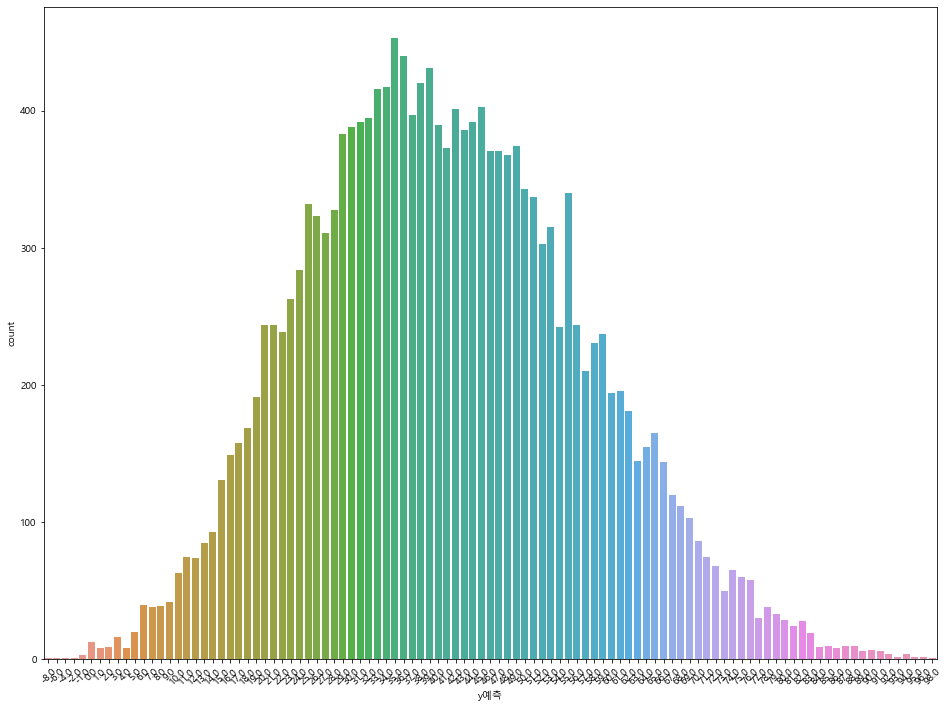

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

fig, (ax1) = plt.subplots(1,1, figsize=(16,12))
sns.countplot(data=pred_y, x="y예측", ax=ax1)
plt.xticks(rotation=45)

---

---

---

# ■ ols 모델에서 중요 변수를 선택하는 과정을 수행해보자

# 0.변수선택법
###  ▶ R-squared(설명력): 31.7%
###  ▶ AIC: 4.540e+05

In [98]:
feature_columns = train_x.columns.difference(["EPDO1"])

In [99]:
#변수 선택법
def processSubset(x,y, feature_set):
    model = sm.OLS(y,x[list(feature_set)])  #modeling
    regr = model.fit()  #모델학습
    AIC = regr.aic    #모델의 AIC
    return {"model" : regr , "AIC" : AIC}
 
print(processSubset(x=train_x,y=train_y,feature_set=feature_columns))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000007EB91A7790>, 'AIC': 453791.84796913556}


In [101]:
#모든 조합을 다 조합해서 좋은 모델을 반환시키는 알고리즘
import time
import itertools
 
def getBest(x,y,k):
    tic = time.time()  #시작시간
    results = []       #결과저장공간
    for combo in itertools.combinations(x.columns.difference(['사고유형']),k): 
        combo=(list(combo)+['사고유형'])
        #각 변수조합을 고려한 경우의 수
        results.append(processSubset(x,y,feature_set=combo))#모델링된 것들을 저장
    models=pd.DataFrame(results) #데이터 프레임으로 변환
    #가장 낮은 AIC를 가지는 모델 선택 및 저장
    bestModel = models.loc[models['AIC'].argmin()] #index
    toc = time.time() #종료시간
    print("Processed",models.shape[0],"models on",k,"predictors in",(toc-tic),
          "seconds.")
    return  bestModel

In [102]:
print(getBest(x=train_x,y=train_y,k=2))

Processed 21 models on 2 predictors in 0.18761563301086426 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                                 454699
Name: 4, dtype: object


In [103]:
#변수 선택에 따른 학습시간과 저장 K 반복
 
models = pd.DataFrame(columns=["AIC","model"])
tic = time.time()
for i in range(1,5):
    models.loc[i] = getBest(train_x,train_y,i)
 
toc = time.time()
print("Total elapsed time : ",(toc-tic),"seconds")
 
print(models)

Processed 7 models on 1 predictors in 0.0521392822265625 seconds.
Processed 21 models on 2 predictors in 0.16018104553222656 seconds.
Processed 35 models on 3 predictors in 0.3964197635650635 seconds.
Processed 35 models on 4 predictors in 0.4918632507324219 seconds.
Total elapsed time :  1.1483869552612305 seconds
             AIC                                              model
1  455893.090551  <statsmodels.regression.linear_model.Regressio...
2  454699.327077  <statsmodels.regression.linear_model.Regressio...
3  454091.137269  <statsmodels.regression.linear_model.Regressio...
4  453968.475481  <statsmodels.regression.linear_model.Regressio...


In [104]:
models.loc[4,"model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  EPDO1   R-squared (uncentered):                   0.317
Model:                            OLS   Adj. R-squared (uncentered):              0.317
Method:                 Least Squares   F-statistic:                              3774.
Date:                Mon, 07 Dec 2020   Prob (F-statistic):                        0.00
Time:                        10:12:52   Log-Likelihood:                     -2.2698e+05
No. Observations:               40641   AIC:                                  4.540e+05
Df Residuals:                   40636   BIC:                                  4.540e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
도로종류           5.0688      0.251     20.200      0.000       4.577       5.561
발생시각           2.7991      0.155     18.018      0.000       2.495       3.104
피해자신체상해주부위     1.9636      0.059     33.282      0.000       1.848       2.079
행동유형가해자        1.2196      0.109     11.173      0.000       1.006       1.434
사고유형           0.8189      0.180      4.554      0.000       0.466       1.171
==============================================================================
Omnibus:                    26301.280   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           262025.091
Skew:                           3.111   Prob(JB):                         0.00
Kurtosis:                      13.772   Cond. No.                         8.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 1.전진선택법

In [105]:
#전진 선택법(Step=1)
 
def forward(x,y,predictors):
    remainingPredictors = [p for p in x.columns.difference(['사고유형'])
                           if p not in predictors]
    tic=time.time()
    results=[]
    for p in remainingPredictors:
        results.append(processSubset(x=x,y=y,feature_set=predictors+[p]+['사고유형']))
    #데이터프레임으로 변환
    models = pd.DataFrame(results)
 
    #AIC가 가장 낮은 것을 선택
    bestModel = models.loc[models['AIC'].argmin()] #index
    toc = time.time()
    print("Processed ", models.shape[0],"models on", len(predictors)+1,
          "predictors in",(toc-tic))
    print("Selected predictors:",bestModel['model'].model.exog_names,
          'AIC : ',bestModel[0])
    return bestModel
 
#전진선택법 모델
def forward_model(x,y):
    fModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    #미리 정의된 데이터 변수
    predictors = []
    #변수1~10개 : 0~9 -> 1~10
    for i in range(1,len(x.columns.difference(['사고유형']))+1):
        forwardResult= forward(x,y,predictors)
        if i > 1:
            if forwardResult['AIC'] > fmodelBefore:
                break
        fModels.loc[i] = forwardResult
        predictors = fModels.loc[i]["model"].model.exog_names
        fmodelBefore = fModels.loc[i]["AIC"]
        predictors = [k for k in predictors if k != '사고유형']
    toc = time.time()
    print("Total elapesed time : ", (toc - tic), "seconds.")
 
    return (fModels['model'][len(fModels['model'])])
 
forwordBestModel=forward_model(train_x,train_y)
 
print(forwordBestModel.summary())

Processed  7 models on 1 predictors in 0.054643869400024414
Selected predictors: ['피해자신체상해주부위', '사고유형'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000007ED7CE2AF0>
Processed  6 models on 2 predictors in 0.04562091827392578
Selected predictors: ['피해자신체상해주부위', '도로종류', '사고유형'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000007ED7471CA0>
Processed  5 models on 3 predictors in 0.05965828895568848
Selected predictors: ['피해자신체상해주부위', '도로종류', '발생시각', '사고유형'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000007ED7CE2D30>
Processed  4 models on 4 predictors in 0.06316733360290527
Selected predictors: ['피해자신체상해주부위', '도로종류', '발생시각', '행동유형가해자', '사고유형'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000007ED7CE2610>
Processed  3 models on 5 predictors in 0.0626668930053711
Selected predictors: ['피해자신체상해주부위', '도로종류', '발생시각', '행동유형가해자', '연령가해자', '사고유형'] AI

# 2.후진제거법

In [106]:
#후진제거법
 
def backward(x,y,predictors):
    tic = time.time()
    results=[]
    #데이터 변수들이 미리정의된 predictors 조합확인
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(x,y,list(combo)+['사고유형']))
    models = pd.DataFrame(results)
    #가장 낮은 AIC를 가진 모델을 선택
    bestModel = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed",models.shape[0],"models on",len(predictors)-1,
          "predictors in",(toc - tic))
    print("Selected predictors :",bestModel['model'].model.exog_names,
          ' AIC:',bestModel[0])
    return bestModel
 
def backword_model(x,y):
    BModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    #미리 정의된 데이터 변수
    predictors = x.columns.difference(['사고유형'])
    BmodelBefore = processSubset(x,y,predictors)['AIC']
    while(len(predictors)>1):
        backwardResult=backward(train_x,train_y,predictors)
        if backwardResult['AIC'] > BmodelBefore:
            break
        BModels.loc[len(predictors)-1] = backwardResult
        predictors = BModels.loc[len(predictors)-1]["model"].model.exog_names
        BmodelBefore = backwardResult["AIC"]
        predictors = [ k for k in predictors if k != '사고유형']
 
    toc = time.time()
    print("Total elapsed time :",(toc - tic), "seconds.")
    return (BModels["model"].dropna().iloc[0])
 
backwardBestModel = backword_model(train_x,train_y)
print(backwardBestModel.summary())

Processed 7 models on 6 predictors in 0.12992358207702637
Selected predictors : ['도로종류', '발생시각', '연령가해자', '차량용도가해자_중분류', '피해자신체상해주부위', '행동유형가해자', '사고유형']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000007ED7492DC0>
Processed 6 models on 5 predictors in 0.09375739097595215
Selected predictors : ['도로종류', '발생시각', '연령가해자', '피해자신체상해주부위', '행동유형가해자', '사고유형']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000007ED74666A0>
Total elapsed time : 0.28041553497314453 seconds.
                                 OLS Regression Results                                
Dep. Variable:                  EPDO1   R-squared (uncentered):                   0.320
Model:                            OLS   Adj. R-squared (uncentered):              0.320
Method:                 Least Squares   F-statistic:                              2732.
Date:                Mon, 07 Dec 2020   Prob (F-statistic):                        0.00
Time:                

# 3.단계적선택법

In [107]:
def Stepwise_model(x,y):
    stepModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    predictors = []
    SmodelBefore = processSubset(x,y,predictors+['사고유형'])['AIC']
    #변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(x.columns.difference(['사고유형']))+1):
        forwardResult = forward(x,y,predictors)
        print("forward")
        stepModels.loc[i] = forwardResult
        predictors = stepModels.loc[i]["model"].model.exog_names
        predictors = [k for k in predictors if k != '사고유형']
        backwordResult = backward(x,y,predictors)
        if backwordResult['AIC'] < forwardResult['AIC']:
            stepModels.loc[i] = backwordResult
            predictors=stepModels.loc[i]["model"].model.exog_names
            smodelBefore=stepModels.loc[i]["AIC"]
            predictors=[k for k in predictors if k != '사고유형']
            print('backward')
        if stepModels.loc[i]["AIC"] > SmodelBefore:
            break
        else:
            smodelBefore = stepModels.loc[i]["AIC"]
    toc=time.time()
    print("Total elapsed time : ", (toc - tic), "seconds")
    return (stepModels['model'][len(stepModels['model'])])
 
stepwiseBestModel = Stepwise_model(train_x,train_y)
print(stepwiseBestModel.summary())

Processed  7 models on 1 predictors in 0.04612112045288086
Selected predictors: ['피해자신체상해주부위', '사고유형'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000007ED748D430>
forward
Processed 1 models on 0 predictors in 0.0046041011810302734
Selected predictors : ['사고유형']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000007ED748D100>
Processed  6 models on 2 predictors in 0.031253814697265625
Selected predictors: ['피해자신체상해주부위', '도로종류', '사고유형'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000007ED74980A0>
forward
Processed 2 models on 1 predictors in 0.0
Selected predictors : ['피해자신체상해주부위', '사고유형']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000007ED7CD4550>
Processed  5 models on 3 predictors in 0.06250643730163574
Selected predictors: ['피해자신체상해주부위', '도로종류', '발생시각', '사고유형'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at

---

---

# ■ 스피어만 상관분석 테스트
### ▶ 순서척도로 바꾼 뒤 상관분석(척도의 형태를 고려하여 스피어만 사용)을 하여도 결과가 좋지 않음

In [108]:
cor_data = df.corr(method='spearman')

<AxesSubplot:>

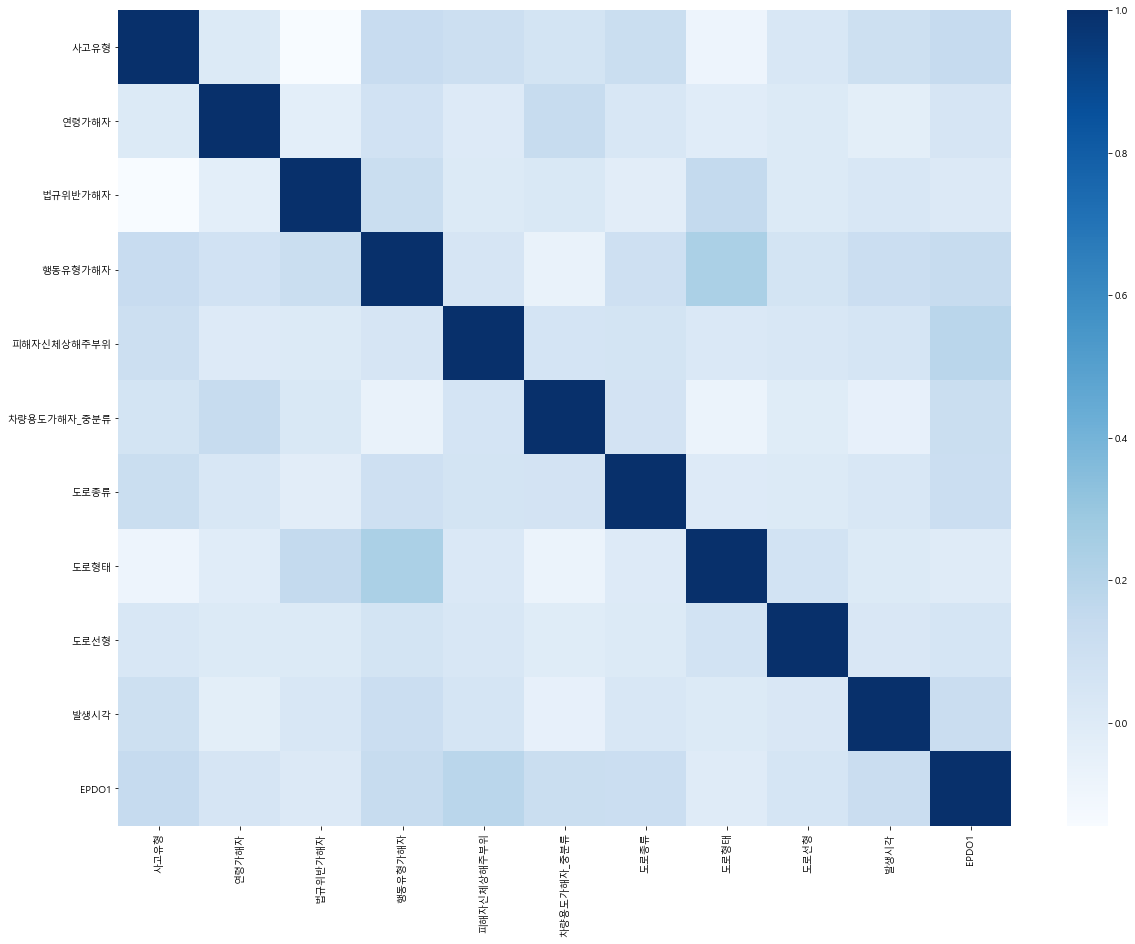

In [109]:
import matplotlib.pyplot as plt 
import seaborn as sns

# 한글 폰트 깨지는 것 때문에 추가함
import matplotlib
from matplotlib import font_manager, rc
import platform

matplotlib.rcParams['axes.unicode_minus'] = False

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.figure(figsize=(20,15))
sns.heatmap(cor_data, cbar = True, annot = False, square = False, cmap = 'Blues')